In [1]:
import pandas as pd
import numpy as np

In [3]:
chicagocrime  = pd.read_csv("Chicago_Crime_Detective.csv")

In [14]:
chicagocrime.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


1. What is the Month and Year of the median date in our dataset?  : May 2006

In [96]:
chicagocrime.median()

Unnamed: 0      95820.0
ID            4762956.0
Arrest              0.0
Domestic            0.0
Beat             1121.0
Year             2006.0
year             2006.0
dtype: float64

In [102]:
chicagocrime['Date'].quantile(.5)

Timestamp('2006-05-21 12:30:00')

2. Month in which the lowest crime occured:  Feburary.

In [17]:
chicagocrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
Unnamed: 0             191641 non-null int64
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
dtypes: bool(2), int64(4), object(4)
memory usage: 12.1+ MB


In [7]:
chicagocrime['Date'] = pd.to_datetime(chicagocrime['Date'])

In [19]:
chicagocrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
Unnamed: 0             191641 non-null int64
ID                     191641 non-null int64
Date                   191641 non-null datetime64[ns]
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
dtypes: bool(2), datetime64[ns](1), int64(4), object(3)
memory usage: 12.1+ MB


In [21]:
chicagocrime['Month'] = chicagocrime.Date.dt.month_name()

In [22]:
chicagocrime.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December


In [23]:
chicagocrime.Month.value_counts()

October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Month, dtype: int64

3. On which weekday did most motor vehicle thefts occur? * : Friday

In [29]:
chicagocrime['Date'].dt.weekday_name

0         Monday
1         Monday
2         Monday
3         Monday
4         Monday
           ...  
191636    Monday
191637    Monday
191638    Monday
191639    Monday
191640    Monday
Name: Date, Length: 191641, dtype: object

In [30]:
chicagocrime['Date'].dt.weekday_name.value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Date, dtype: int64

4. Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? *
Ans: January

In [32]:
chicagocrime.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December


In [33]:
import seaborn as sns

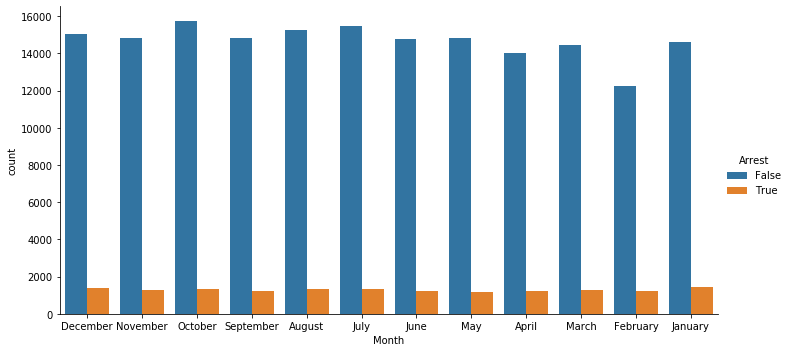

In [35]:
sns.catplot("Month",kind = 'count',hue  = 'Arrest',data = chicagocrime, aspect = 2)

In [47]:
chicagocrime.Domestic[chicagocrime.Arrest== True].count()

15536

In [51]:
#creating a dataframe where arrest values are true

In [43]:
d = chicagocrime.loc[chicagocrime.Arrest == True, :]

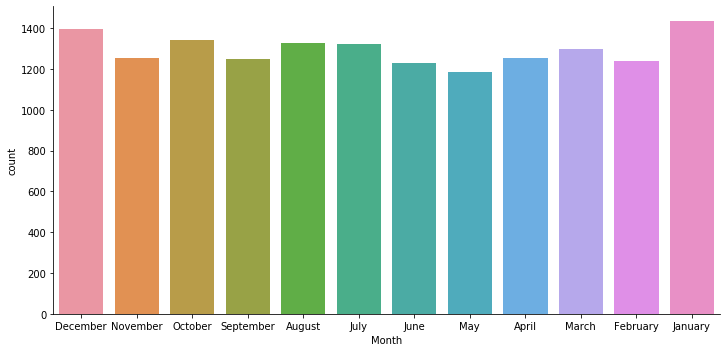

In [45]:
sns.catplot("Month",kind = 'count',data = d, aspect = 2)

In [48]:
chicagocrime['year'] = chicagocrime.Date.dt.year

In [49]:
chicagocrime.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,December,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,December,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,December,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,December,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,December,2012


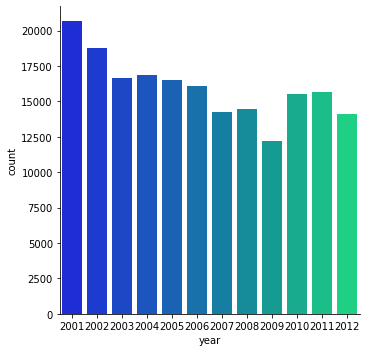

In [52]:
sns.catplot('year', data = chicagocrime,kind = 'count', palette='winter')

Observations from the above graph : 
    1. In general, look like crime decreases from 2002 - 2012
    2. In general,it looks like crime increases from 2009 - 2011

6. Crimes for which more arrests were made are in the first half of the time period or the second half of the time period:
    Arrest were made more in the first half.

In [53]:
d.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
5,5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,December
8,8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012,December
13,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,December
47,47,8949895,2012-12-30 19:46:00,ALLEY,True,False,2512,25,18,2012,December
59,59,8949557,2012-12-30 15:00:00,STREET,True,False,2535,25,23,2012,December


In [57]:
d.groupby("Year").count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Month
Year,,,,,,,,,,
2001,2152,2152,2152,2152,2152,2152,2152,3,36,2152
2002,2115,2115,2115,2115,2115,2115,2115,23,1506,2115
2003,1798,1798,1798,1798,1798,1798,1798,1415,1798,1798
2004,1693,1693,1693,1693,1693,1693,1693,1691,1693,1693
2005,1528,1528,1528,1528,1528,1528,1528,1523,1528,1528
2006,1302,1302,1302,1302,1302,1302,1302,1301,1302,1302
2007,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
2008,1020,1020,1020,1020,1020,1020,1020,1013,1020,1020
2009,840,840,840,840,840,840,840,833,839,840


In [ ]:
#From the above table it is clear that the arrest were made more in the first half.

7. For what proportion of motor vehicle thefts in 2001 was an arrest made? * : 0.1

In [75]:
chicagocrime.sample(10)

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,year
106130,106130,4380197,2005-10-14 09:00:00,STREET,False,False,1723,17,14,2005,October,2005
82893,82893,5400822,2007-03-25 16:20:00,STREET,False,False,2534,25,23,2007,March,2007
114905,114905,3886423,2005-03-29 23:00:00,STREET,False,False,1432,14,22,2005,March,2005
13635,13635,8437175,2012-01-11 15:00:00,RESIDENCE-GARAGE,False,False,1923,19,6,2012,January,2012
36848,36848,7641353,2010-08-03 22:00:00,STREET,False,False,412,4,45,2010,August,2010
42302,42302,7419722,2010-03-23 07:30:00,STREET,False,False,922,9,59,2010,March,2010
29881,29881,7866891,2010-12-29 04:00:00,STREET,False,False,825,8,66,2010,December,2010
171954,171954,1898735,2001-12-14 18:30:00,PARKING LOT/GARAGE(NON.RESID.),False,False,1122,NaN,NaN,2001,December,2001
180242,180242,1675845,2001-08-08 00:01:00,STREET,False,False,1222,NaN,NaN,2001,August,2001
1750,1750,8897073,2012-11-19 08:30:00,STREET,False,False,233,2,41,2012,November,2012


In [93]:
chicagocrime.loc[chicagocrime.year == 2007].count()

Unnamed: 0             14280
ID                     14280
Date                   14280
LocationDescription    14280
Arrest                 14280
Domestic               14280
Beat                   14280
District               14271
CommunityArea          14280
Year                   14280
Month                  14280
year                   14280
dtype: int64

In [94]:
chicagocrime.loc[(chicagocrime.year == 2007) & (chicagocrime.Arrest ==True)].count()

Unnamed: 0             1212
ID                     1212
Date                   1212
LocationDescription    1212
Arrest                 1212
Domestic               1212
Beat                   1212
District               1212
CommunityArea          1212
Year                   1212
Month                  1212
year                   1212
dtype: int64

Therefore proportion is 2152/20669  = 0.1

7. Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? *

In [72]:
chicagocrime.LocationDescription.value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

8. Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5? *

In [78]:
chicagocrime.loc[(chicagocrime.LocationDescription == 'STREET') | (chicagocrime.LocationDescription == 'PARKING LOT/GARAGE(NON.RESID.)')].count()

Unnamed: 0             171416
ID                     171416
Date                   171416
LocationDescription    171416
Arrest                 171416
Domestic               171416
Beat                   171416
District               132883
CommunityArea          149355
Year                   171416
Month                  171416
year                   171416
dtype: int64

9 On which day of the week do the most motor vehicle thefts at gas stations happen? *

In [ ]:
#creating a dataframe having only gas stationa and adding a column weekday as well

In [8]:
d1 = chicagocrime.loc[chicagocrime.LocationDescription == 'GAS STATION' ,:]

In [91]:
d1.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,year,weekday
13,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,December,2012,Monday
106,106,8948353,2012-12-29 10:00:00,GAS STATION,False,False,823,8,66,2012,December,2012,Saturday
213,213,8945802,2012-12-27 10:00:00,GAS STATION,False,False,321,3,42,2012,December,2012,Thursday
278,278,8943877,2012-12-25 10:00:00,GAS STATION,False,False,332,3,43,2012,December,2012,Tuesday
290,290,8943595,2012-12-24 21:55:00,GAS STATION,False,False,421,4,43,2012,December,2012,Monday


In [16]:
d1['weekday'] = d1.Date.dt.weekday_name

F:\Ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
d1

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,year,weekday
13,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,December,2012,Monday
106,106,8948353,2012-12-29 10:00:00,GAS STATION,False,False,823,8,66,2012,December,2012,Saturday
213,213,8945802,2012-12-27 10:00:00,GAS STATION,False,False,321,3,42,2012,December,2012,Thursday
278,278,8943877,2012-12-25 10:00:00,GAS STATION,False,False,332,3,43,2012,December,2012,Tuesday
290,290,8943595,2012-12-24 21:55:00,GAS STATION,False,False,421,4,43,2012,December,2012,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191335,191335,1323645,2001-01-06 16:00:00,GAS STATION,False,False,623,NaN,NaN,2001,January,2001,Saturday
191350,191350,1319694,2001-01-06 11:30:00,GAS STATION,False,False,2533,NaN,NaN,2001,January,2001,Saturday
191376,191376,1356080,2001-01-05 22:00:00,GAS STATION,False,False,632,NaN,NaN,2001,January,2001,Friday
191562,191562,1313797,2001-01-02 18:10:00,GAS STATION,False,False,523,NaN,NaN,2001,January,2001,Tuesday


In [90]:
d1.groupby("weekday").count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,year
weekday,,,,,,,,,,,,
Friday,332,332,332,332,332,332,332,244,285,332,332,332
Monday,280,280,280,280,280,280,280,204,236,280,280,280
Saturday,338,338,338,338,338,338,338,258,293,338,338,338
Sunday,336,336,336,336,336,336,336,245,287,336,336,336
Thursday,282,282,282,282,282,282,282,223,248,282,282,282
Tuesday,270,270,270,270,270,270,270,207,235,270,270,270
Wednesday,273,273,273,273,273,273,273,203,232,273,273,273
